In [1]:
# Connecting My Drive to Colab

USING_COLAB = True
if USING_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/netflix_viewing_data.csv', encoding='ISO-8859-1')

# **Data Cleaning**

## **1: Treating NULL Values**

### 1.1 Checking for NULL Values:

In [7]:
df.head()

,Title,Genre,Director,Country,Release Year,Content Type,Duration,Rating,IMDb Rating,Language,Date Watched
0,You are My Destiny,Romance,Kim Myung-wook,South Korea,2014.0,TV Series,36 episodes,PG-13,7.1,Korean,24/09/2024
1,Love Next Door,Romance,NaN,South Korea,NaN,TV Series,NaN,NaN,NaN,Korean,22/09/2024
2,Love Next Door,Romance,NaN,South Korea,NaN,TV Series,NaN,NaN,NaN,Korean,22/09/2024
3,Love Next Door,Romance,NaN,South Korea,NaN,TV Series,NaN,NaN,NaN,Korean,22/09/2024
4,Love Next Door,Romance,NaN,South Korea,NaN,TV Series,NaN,NaN,NaN,Korean,22/09/2024


In [8]:
print(df.isnull().sum())

Title             0
Genre            49
Director        129
Country          58
Release Year     89
Content Type     59
Duration        109
Rating          192
IMDb Rating     118
Language         58
Date Watched      0
dtype: int64


### 1.2 Handling NULL Values:

**1.2.1: Director**

The Director column has 129 missing values. Missing values will be filled with "Unknown" as a placeholder to ensure completeness of the dataset.

In [11]:
df['Director'] = df['Director'].fillna('Unknown')

**1.2.2: Genre**

The Genre column has 49 missing values. Missing values in the Genre column will be filled with "Unknown" to account for any unavailable data.

In [13]:
df['Genre'] = df['Genre'].fillna('Unknown')

**1.2.3: Country**

The Country column has 58 missing values. The missing values in this column will be replaced with "Unknown" to indicate that the country of origin is not specified.

In [14]:
df['Country'] = df['Country'].fillna('Unknown')

**1.2.4: Release Year**

The Release Year column has 89 missing values. We will fill these missing values with "0" to represent cases where the release year is not available.

In [15]:
df['Release Year'] = df['Release Year'].fillna(0)

**1.2.5: Content Type**

The Content Type column has 59 missing values. Missing values will be filled with "Unknown" to represent cases where the content type (e.g., movie or TV show) is not available.

In [16]:
df['Content Type'] = df['Content Type'].fillna('Unknown')

**1.2.6: Duration**

The Duration column has 109 missing values. Missing values in this column will be filled with "Unknown" as a placeholder for cases where the duration is unavailable.

In [17]:
df['Duration'] = df['Duration'].fillna('Unknown')

**1.2.7: Rating**

The Rating column has 192 missing values. Missing ratings will be filled with "Not Rated" to indicate that no rating information is available for these entries.

In [18]:
df['Rating'] = df['Rating'].fillna('Not Rated')

**1.2.8: IMDb Rating**

The IMDb Rating column has 118 missing values. These missing values will be filled with "0" to represent cases where IMDb ratings are unavailable.

In [19]:
df['IMDb Rating'] = df['IMDb Rating'].fillna(0)

**1.2.9: Language**

The Language column has 58 missing values. Missing values will be filled with "Unknown" to account for cases where the language information is not specified.

In [20]:
df['Language'] = df['Language'].fillna('Unknown')

## **2. Unique Entries in the Country Column**

### **Identifying all the entries in the Country Column**

In [21]:
# Display unique country entries
unique_countries = df['Country'].unique()
print(unique_countries)

['South Korea' 'Japan' 'Unknown' 'China' 'USA' 'Spain' 'France' 'UK'
 'Belgium' 'USA, Poland' 'Nigeria' 'India' 'UK, USA' 'South Africa'
 'Kenya' 'Ireland, Canada' 'Turkey' 'Czech Republic' 'USA, UK' 'Germany'
 'USA, Australia' 'Poland' 'USA, Canada' 'New Zealand' 'Norway' 'Mexico'
 'Ghana' 'Canada' 'Italy' 'Russia' 'Hong Kong' 'Vietnam' 'Philippines'
 'Australia' 'Colombia']


### **Split Multiple Countries**
Keeping only the first country mentioned:

In [22]:
# Split by commas and keep the first country
df['Country'] = df['Country'].apply(lambda x: x.split(',')[0].strip() if ',' in x else x)


In [23]:
# Verify the changes
cleaned_unique_countries = df['Country'].unique()
print(cleaned_unique_countries)

['South Korea' 'Japan' 'Unknown' 'China' 'USA' 'Spain' 'France' 'UK'
 'Belgium' 'Nigeria' 'India' 'South Africa' 'Kenya' 'Ireland' 'Turkey'
 'Czech Republic' 'Germany' 'Poland' 'New Zealand' 'Norway' 'Mexico'
 'Ghana' 'Canada' 'Italy' 'Russia' 'Hong Kong' 'Vietnam' 'Philippines'
 'Australia' 'Colombia']


# **DataFrame Creation for Informational Analysis**

To ensure that analyses such as genre distribution, IMDb ratings, and content type breakdowns are not affected by duplicate entries, we created a new DataFrame, df_info_only. This DataFrame focuses solely on the informational aspects of the dataset and excludes any time-based data.

**Key steps:**

Dropped the 'Date Watched' column: Since time-based analysis is not relevant for this DataFrame, the Date Watched column was removed.

Removed duplicates based on 'Title': To avoid multiple entries of the same show or movie, duplicates were removed, keeping only the first occurrence of each unique title.

This cleaned DataFrame will be used for various analyses, including genre, ratings, and content type distribution, without the influence of duplicate records.

In [24]:
df_info_only = df.drop(columns=['Date Watched']).drop_duplicates(subset=['Title'])

print(df_info_only.head())

                Title     Genre        Director      Country  Release Year  \
0  You are My Destiny   Romance  Kim Myung-wook  South Korea        2014.0   
1      Love Next Door   Romance         Unknown  South Korea           0.0   
5                 Eve  Thriller  Park Bong-seop  South Korea        2022.0   
8       Chastity High   Unknown         Unknown  South Korea           0.0   
9      Hotel Del Luna   Fantasy  Oh Choong-hwan  South Korea        2019.0   

  Content Type     Duration     Rating  IMDb Rating Language  
0    TV Series  36 episodes      PG-13          7.1   Korean  
1    TV Series      Unknown  Not Rated          0.0   Korean  
5    TV Series  16 episodes        18+          7.5   Korean  
8    TV Series      Unknown  Not Rated          0.0   Korean  
9    TV Series  16 episodes      PG-13          8.2   Korean  


# **Visualisations!!!**

### **1. Genre Popularity**

<ipython-input-47-c221f2426e90>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


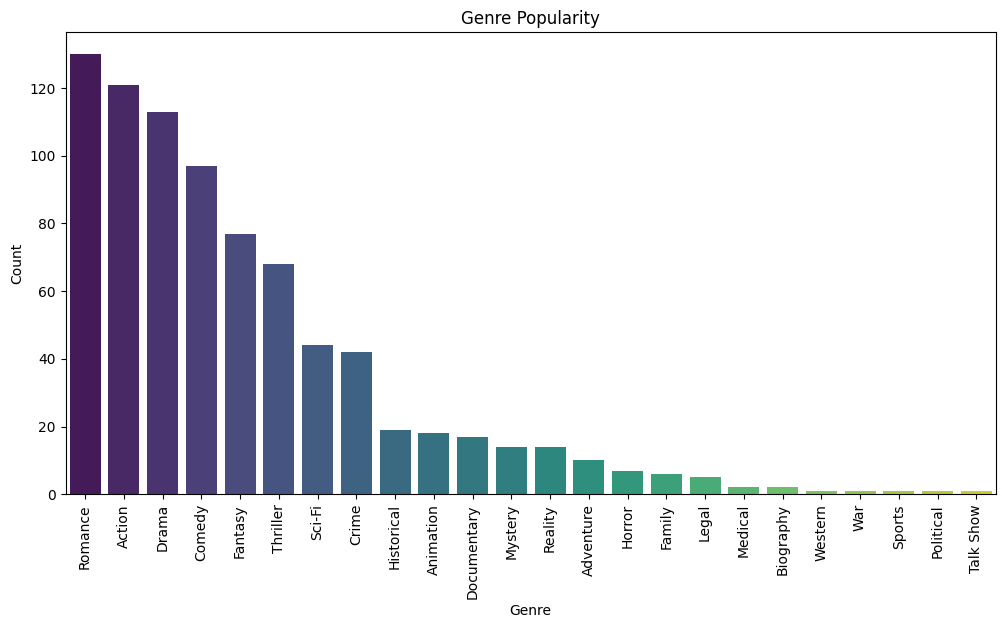

In [47]:
# Filter out rows with 'Unknown' in 'Genre'
genre_data = df_info_only[df_info_only['Genre'] != 'Unknown']

# Create the bar chart
import matplotlib.pyplot as plt
import seaborn as sns

genre_counts = genre_data['Genre'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Genre Popularity")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


### **2. Time Series Analysis of Viewing Trends**

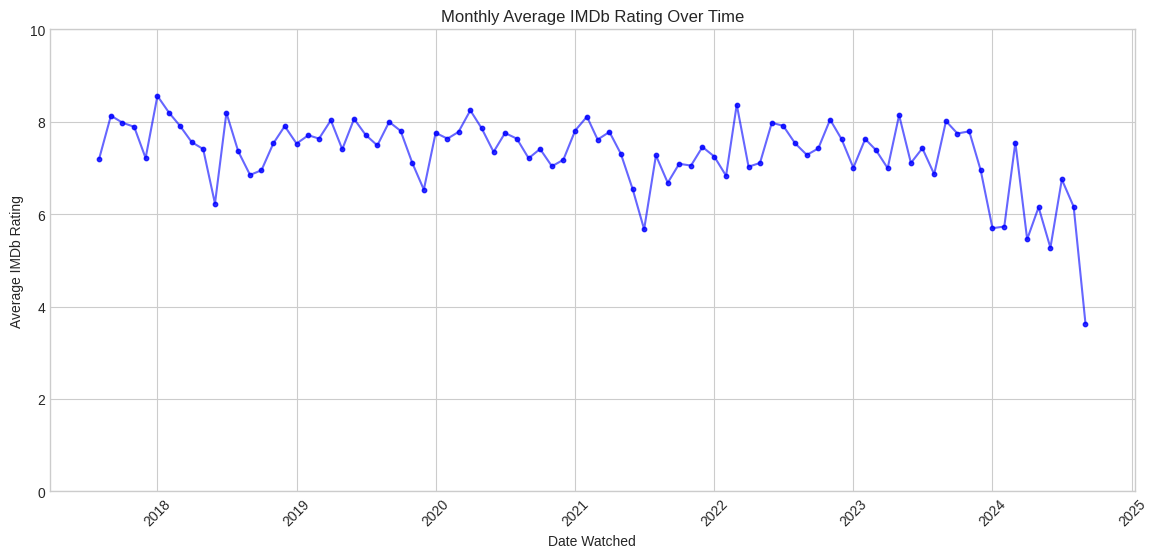

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use 'seaborn-v0_8-whitegrid' style
plt.style.use('seaborn-v0_8-whitegrid')

# Convert 'Date Watched' to datetime if it's not already
df_time_series['Date Watched'] = pd.to_datetime(df_time_series['Date Watched'])

# Ensure 'IMDb Rating' is numeric, converting non-numeric entries to NaN
# The errors='coerce' argument will replace invalid parsing with NaN
df_time_series['IMDb Rating'] = pd.to_numeric(df_time_series['IMDb Rating'], errors='coerce')

# Drop rows where 'IMDb Rating' is NaN
df_time_series_cleaned = df_time_series.dropna(subset=['IMDb Rating'])

# Resample data to get the average IMDb rating per month
# 'MS' for month start frequency
monthly_data = df_time_series_cleaned.resample('MS', on='Date Watched')['IMDb Rating'].mean()

# Plotting with a smoother line and reduced transparency
plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data.values, color='blue', alpha=0.6) # Access the values for plotting
plt.scatter(monthly_data.index, monthly_data.values, color='blue', s=10, alpha=0.8)  # Adding points for clarity

# Improve aesthetics
plt.title("Monthly Average IMDb Rating Over Time")
plt.xlabel("Date Watched")
plt.ylabel("Average IMDb Rating")
plt.xticks(rotation=45)
plt.ylim(0, 10)  # IMDb ratings generally range from 0 to 10

plt.show()

### **3. Heatmap of Viewing Trends by Month and Year**
This heatmap shows the average IMDb rating by Month and Year, providing insights into trends over time.

<ipython-input-60-ea54f6406de2>:7: FutureWarning: The provided callable <function mean at 0x7a98f1301000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df_time_series_filtered.pivot_table(values='IMDb Rating', index='Year', columns='Month', aggfunc=np.mean)


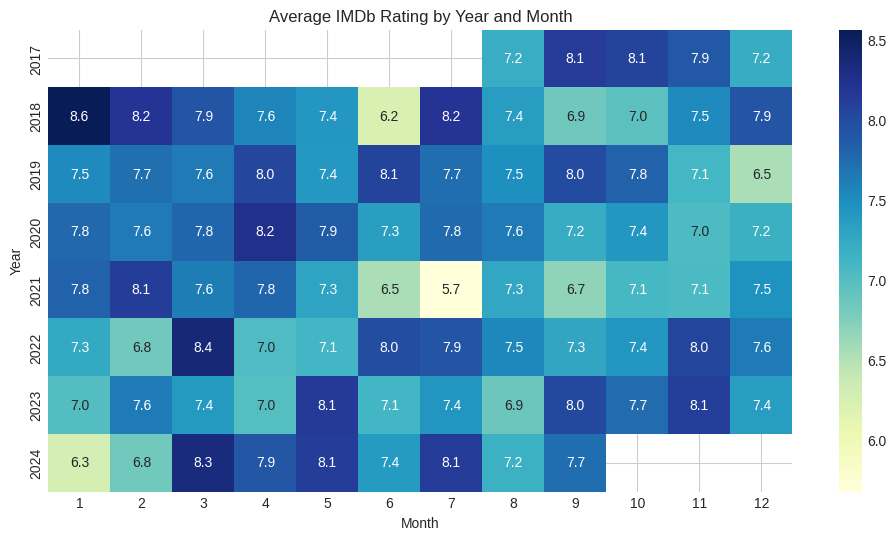

In [60]:
import numpy as np

# Filter out rows with '0' in 'Release Year' or 'Rating'
df_time_series_filtered = df_time_series[(df_time_series['Release Year'] != 0) & (df_time_series['Rating'] != 0)]

# Pivot table for heatmap data
heatmap_data = df_time_series_filtered.pivot_table(values='IMDb Rating', index='Year', columns='Month', aggfunc=np.mean)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Average IMDb Rating by Year and Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

### **4. IMDb Rating Distribution by Content Type**
This box plot shows the distribution of IMDb ratings across different content types, allowing for a comparison between movies and series in terms of viewer ratings.

<ipython-input-64-845f1e1d4968>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rating_data, x='Content Type', y='IMDb Rating', palette="Set2")


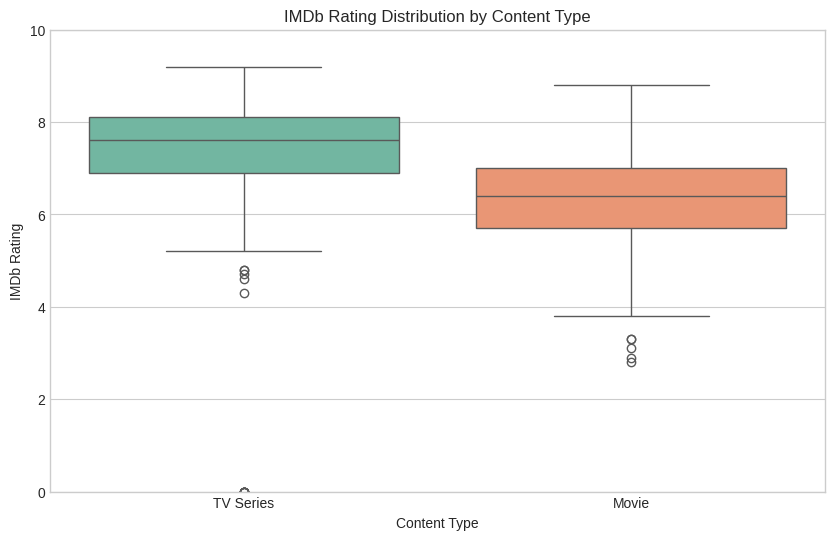

In [64]:
# Filter out rows with 'Unknown' in 'Content Type'
rating_data = df_info_only[df_info_only['Content Type'] != 'Unknown']

# Plot IMDb rating distribution by content type
plt.figure(figsize=(10, 6))
sns.boxplot(data=rating_data, x='Content Type', y='IMDb Rating', palette="Set2")
plt.title("IMDb Rating Distribution by Content Type")
plt.xlabel("Content Type")
plt.ylabel("IMDb Rating")
plt.ylim(0, 10)  # IMDb ratings generally range from 0 to 10
plt.show()


The box plot compares IMDb ratings between Movies and TV Series. The median rating for TV Series is slightly higher than for Movies, suggesting that TV Series tend to be rated more favourably. The interquartile range (IQR) for TV Series is narrower, indicating a more consistent rating distribution, while Movies show a broader range. Both content types have outliers, but Movies have several low-rated outliers, which pull down their overall rating spread. This visualisation highlights that TV Series generally maintain higher and more consistent IMDb ratings compared to Movies.

### **5. Top Countries by IMDb Rating**

This bar chart shows the average IMDb rating for the top countries, allowing us to identify which countries tend to have the highest-rated content.

<ipython-input-65-165aa390ca5c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")


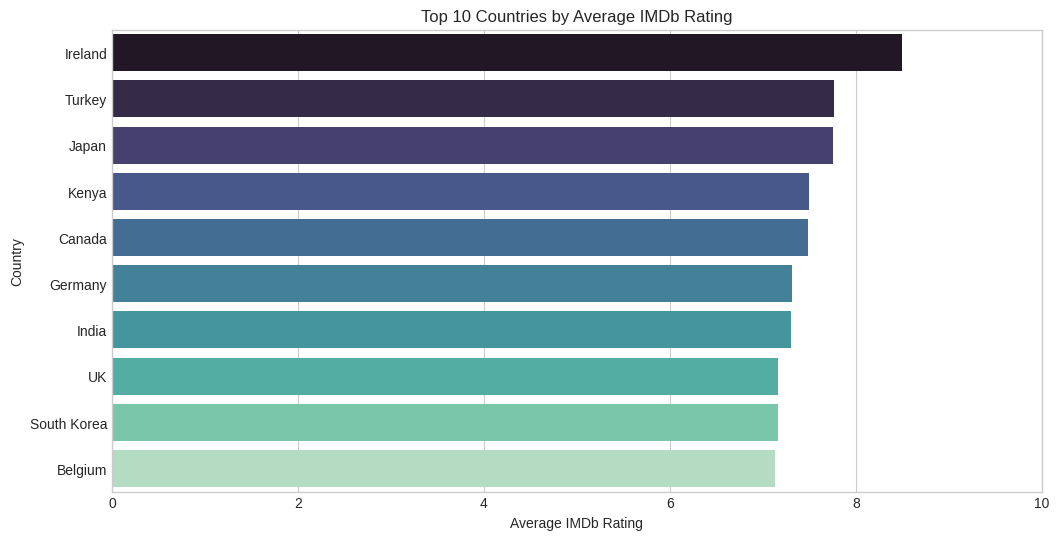

In [65]:
# Filter out rows with 'Unknown' in 'Country'
country_data = df_info_only[df_info_only['Country'] != 'Unknown']

# Calculate average IMDb rating by country
top_countries = country_data.groupby('Country')['IMDb Rating'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title("Top 10 Countries by Average IMDb Rating")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Country")
plt.xlim(0, 10)
plt.show()

### **6. Content Type by Country**
This stacked bar chart shows the distribution of Movies and TV Series by country, highlighting which countries favour each content type.

<Figure size 1600x600 with 0 Axes>

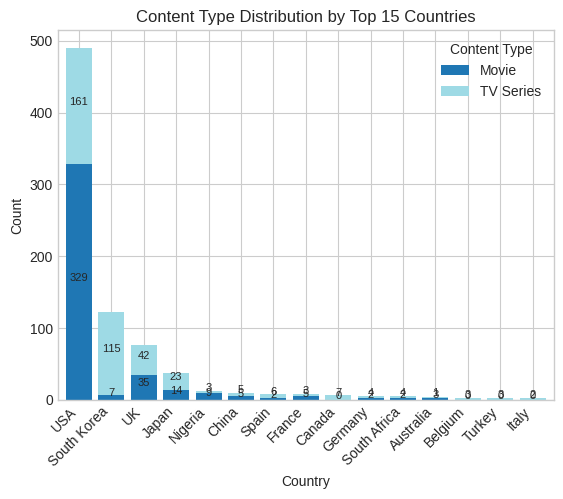

In [71]:
import matplotlib.pyplot as plt

# Sort countries by total content count
top_countries = country_content_counts.loc[country_content_counts.sum(axis=1).sort_values(ascending=False).head(15).index]

# Adjust plot settings
plt.figure(figsize=(16, 6))
ax = top_countries.plot(kind='bar', stacked=True, width=0.8, colormap="tab20")
plt.title("Content Type Distribution by Top 15 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Content Type", loc="upper right")

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, fmt='%d', padding=3)

plt.show()

### **7. Language Distribution of Top Content (Grouped <2% as 'Other')**
This pie chart shows the distribution of languages in the top content, with English and Korean as the most prominent. Languages with less than 2% representation are grouped into "Other" to maintain clarity.

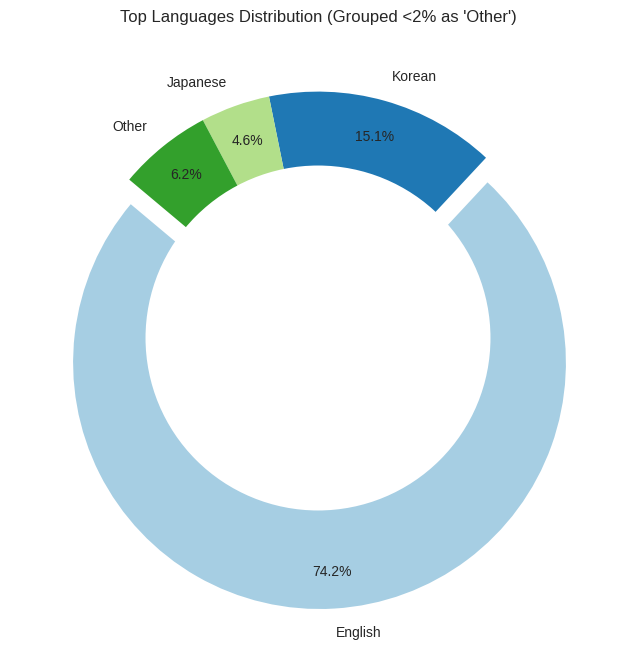

In [75]:
import matplotlib.pyplot as plt

# Calculate the top languages with a threshold of 2%
language_counts = language_data['Language'].value_counts(normalize=True) * 100
top_languages = language_counts[language_counts >= 2]
top_languages['Other'] = language_counts[language_counts < 2].sum()

# Plot with enhanced settings
plt.figure(figsize=(8, 8))
explode = [0.1 if lang == 'English' else 0 for lang in top_languages.index]  # Explode the largest segment
colors = sns.color_palette("Paired", len(top_languages))

plt.pie(top_languages, labels=top_languages.index, autopct='%1.1f%%', startangle=140,
        explode=explode, colors=colors, pctdistance=0.85, textprops={'fontsize': 10})

# Draw circle in the center to make it a donut chart for style
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Top Languages Distribution (Grouped <2% as 'Other')")
plt.show()


### **8. Yearly Content Consumption by Content Type**
Tracks the number of Movies vs. TV Series watched each year, showing trends in content consumption over time.

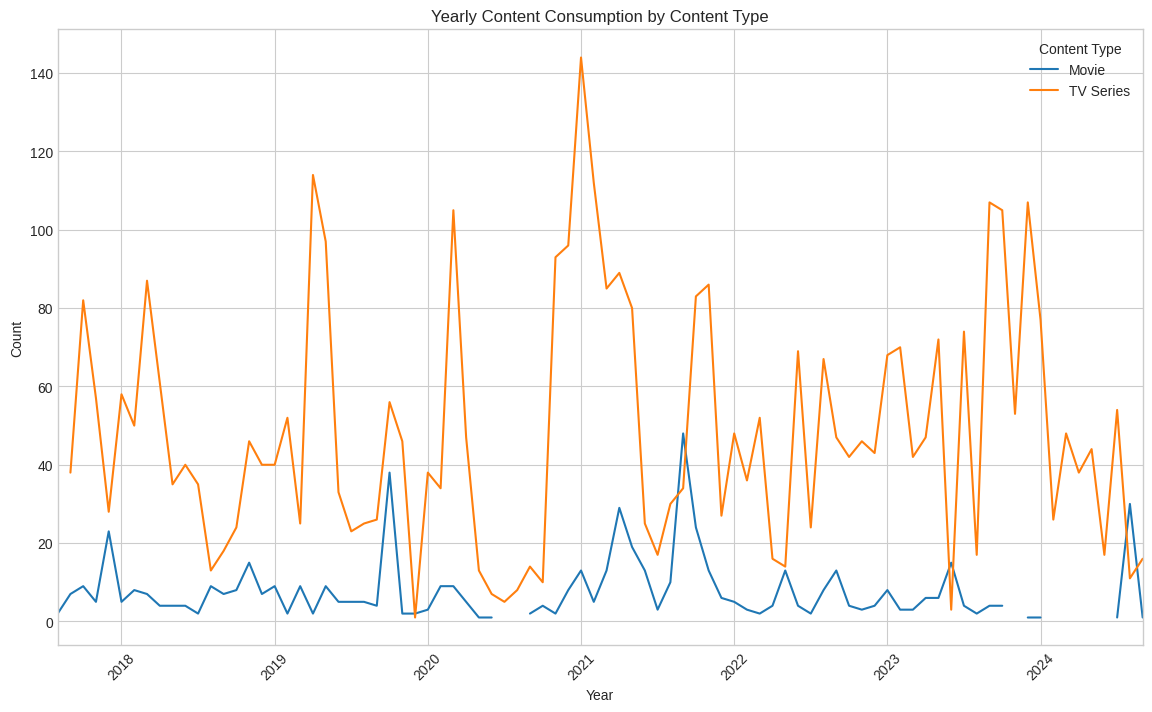

In [81]:
# Convert 'Date Watched' to datetime
df_time_series['Date Watched'] = pd.to_datetime(df_time_series['Date Watched'])

# remove unknown
df_time_series = df_time_series[df_time_series['Content Type'] != 'Unknown']

# Count content type by month
content_trend = df_time_series.groupby([df_time_series['Date Watched'].dt.to_period('M'), 'Content Type']).size().unstack()

# Plot
plt.figure(figsize=(14, 8))
content_trend.plot(kind='line', ax=plt.gca())
plt.title("Yearly Content Consumption by Content Type")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# **1. Time-Based Analysis**

**Summary:**

Most Watched Month: Shows the month with the highest viewing activity.

Least Watched Month: Shows the month with the lowest viewing activity.

Most Watched Year: Shows the year with the most content watched.

Least Watched Year: Shows the year with the least content watched.

### **1.1 Extract the Month and Year**

Extracting the month and year from the Date Watched column to group the content watched by month.

In [25]:
# Rename df to df_time_series
df_time_series = df.copy()

In [26]:
# Convert 'Date Watched' to datetime format
df_time_series['Date Watched'] = pd.to_datetime(df_time_series['Date Watched'], format='%d/%m/%Y', errors='coerce')

In [27]:
# Extract month and year from 'Date Watched'
df_time_series['Month'] = df_time_series['Date Watched'].dt.month
df_time_series['Year'] = df_time_series['Date Watched'].dt.year

In [28]:
# Group by Year and Month and count the number of shows/movies watched
content_per_month = df_time_series.groupby(['Year', 'Month']).size()

content_per_month

Year  Month
2017  8         2
      9        45
      10       92
      11       62
      12       51
               ..
2024  5        58
      6        21
      7        59
      8        43
      9        17
Length: 86, dtype: int64

### **1.2 Find the month with the Most and Least Viewing Activity**

In [29]:
most_watched_month = content_per_month.idxmax()
most_watched_count = content_per_month.max()

least_watched_month = content_per_month.idxmin()
least_watched_count = content_per_month.min()

print(f"The most watched month: {most_watched_month} with {most_watched_count} shows/movies watched.")
print(f"The least watched month: {least_watched_month} with {least_watched_count} shows/movies watched.")


The most watched month: (2021, 1) with 157 shows/movies watched.
The least watched month: (2017, 8) with 2 shows/movies watched.


### **1.3 Find the Year with the Most and Least Viewing Activity**

In [30]:
content_per_year = df_time_series.groupby('Year').size()

most_watched_year = content_per_year.idxmax()
most_watched_year_count = content_per_year.max()

least_watched_year = content_per_year.idxmin()
least_watched_year_count = content_per_year.min()

print(f"The year with the most viewing activity: {most_watched_year} with {most_watched_year_count} shows/movies watched.")
print(f"The year with the least viewing activity: {least_watched_year} with {least_watched_year_count} shows/movies watched.")

The year with the most viewing activity: 2021 with 1008 shows/movies watched.
The year with the least viewing activity: 2017 with 252 shows/movies watched.


# **2. Genre Analysis**

**Summary:**

Genre Count: Shows the total number of shows/movies watched for each genre.

Most/Least Watched Genres: Identifies which genres you watched the most and least.

Highest/Lowest Rated Genres: Compares IMDb ratings across genres.

Listing the shows with IMDb ratings higher than 8.0 with their genres.

## **Count of All Genres**
This gives a full breakdown of how many shows or movies fall under each genre.

In [31]:
genre_count = df_info_only['Genre'].value_counts()

print("Count of all genres:")
genre_count

Count of all genres:


,count
Genre,
Romance,130
Action,121
Drama,113
Comedy,97
Fantasy,77
Thriller,68
Sci-Fi,44
Crime,42
Historical,19


## **Most and Least Watched Genres**
This identifies what I've watched the most and the least.

In [32]:
most_watched_genre = genre_count.idxmax()
most_watched_genre_count = genre_count.max()

least_watched_genre = genre_count.idxmin()
least_watched_genre_count = genre_count.min()

print(f"\nThe most watched genre: {most_watched_genre} with {most_watched_genre_count} shows/movies watched.")
print(f"The least watched genre: {least_watched_genre} with {least_watched_genre_count} shows/movies watched.")


The most watched genre: Romance with 130 shows/movies watched.
The least watched genre: Sports with 1 shows/movies watched.


## **Genres with Highest and Lowest IMDb Ratings (Excluding 0 Ratings)**


In [33]:
# Exclude rows where IMDb Rating is 0 (indicating unknown or not rated)
df_rated = df_info_only[df_info_only['IMDb Rating'] != 0]

# Convert 'IMDb Rating' to numeric if needed
df_rated['IMDb Rating'] = pd.to_numeric(df_rated['IMDb Rating'], errors='coerce')

# Group by Genre and calculate the mean IMDb Rating for each genre
imdb_by_genre = df_rated.groupby('Genre')['IMDb Rating'].mean()

# Find the genre with the highest IMDb rating
highest_rated_genre = imdb_by_genre.idxmax()
highest_imdb_rating = imdb_by_genre.max()

# Find the genre with the lowest IMDb rating
lowest_rated_genre = imdb_by_genre.idxmin()
lowest_imdb_rating = imdb_by_genre.min()

print(f"\nThe genre with the highest IMDb rating: {highest_rated_genre} with an average rating of {highest_imdb_rating}.")
print(f"The genre with the lowest IMDb rating: {lowest_rated_genre} with an average rating of {lowest_imdb_rating}.")


The genre with the highest IMDb rating: Sports with an average rating of 8.4.
The genre with the lowest IMDb rating: Reality with an average rating of 6.385714285714286.


<ipython-input-33-7d54abf45934>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['IMDb Rating'] = pd.to_numeric(df_rated['IMDb Rating'], errors='coerce')


## **TV Series with Romance Genre and IMDb Rating > 8.0:**

In [34]:
high_rated_romance_tv = df_info_only[(df_info_only['IMDb Rating'] > 8.0) &
                                     (df_info_only['Genre'].str.contains('Romance')) &
                                     (df_info_only['Content Type'] == 'TV Series')]
high_rated_romance_tv[['Title', 'Genre', 'IMDb Rating']]

,Title,Genre,IMDb Rating
62,Twenty Five Twenty One,Romance,8.7
73,Coffee Prince,Romance,8.2
176,Suspicious Partner,Romance,8.1
290,Youth of May,Romance,8.5
317,Fight for My Way,Romance,8.1
364,Something in the Rain,Romance,8.1
439,Hometown Cha-Cha-Cha,Romance,8.4
475,Because This Is My First Life,Romance,8.1
490,My Love from the Star,Romance,8.2
537,Strong Girl Bong-soon,Romance,8.2


## **TV Series with Crime Genre and IMDb Rating > 8.0:**

In [35]:
high_rated_crime_tv = df_info_only[(df_info_only['IMDb Rating'] > 8.0) &
                                   (df_info_only['Genre'].str.contains('Crime')) &
                                   (df_info_only['Content Type'] == 'TV Series')]
high_rated_crime_tv[['Title', 'Genre', 'IMDb Rating']]

,Title,Genre,IMDb Rating
529,Money Heist,Crime,8.2
613,Luther,Crime,8.4
760,Top Boy,Crime,8.4
1070,Power,Crime,8.1
1310,Peaky Blinders,Crime,8.8
1633,Ozark,Crime,8.5
1889,Narcos,Crime,8.8
3039,The Fall,Crime,8.1
3103,Ashes to Ashes,Crime,8.2
3131,White Collar,Crime,8.2


# **3. Ratings Analysis**

**Summary:**

IMDb Ratings Distribution: Provides an overview of how ratings are spread across the content you've watched, showing the frequency of each IMDb rating.

Ratings by Content Type: Calculates the average IMDb rating for different content types (e.g., movies or TV series) to identify any trends.

## **IMDb Ratings Distribution**
Analysing the overall distribution of IMDb ratings for the entire dataset (excluding any 0 ratings that represent unrated content). This gives us insight into how content is rated in general.

In [41]:
# Exclude rows where IMDb Rating is 0 (indicating unknown or not rated)
df_rated = df_info_only[df_info_only['IMDb Rating'] != 0]

# Convert 'IMDb Rating' to numeric if needed
df_rated['IMDb Rating'] = pd.to_numeric(df_rated['IMDb Rating'], errors='coerce')

# Display the IMDb ratings distribution
imdb_distribution = df_rated['IMDb Rating'].value_counts().sort_index()

# Show the IMDb ratings distribution
imdb_distribution


<ipython-input-41-bb734d75c94e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['IMDb Rating'] = pd.to_numeric(df_rated['IMDb Rating'], errors='coerce')


,count
IMDb Rating,
2.8,1
2.9,1
3.1,1
3.3,2
3.8,1
4.0,1
4.3,6
4.4,5
4.5,5


## **Ratings by Content Type (Excluding Unknown Content Type and 0 IMDb Rating)**
Analysing whether there’s a difference in IMDb ratings between various content types, such as TV series and movies. This helps us to understand whether certain types of content tend to have higher or lower ratings.

In [42]:
# Exclude rows where 'Content Type' is 'Unknown' and 'IMDb Rating' is 0
df_filtered = df_info_only[(df_info_only['Content Type'] != 'Unknown') & (df_info_only['IMDb Rating'] != 0)]

# Convert 'IMDb Rating' to numeric if needed
df_filtered['IMDb Rating'] = pd.to_numeric(df_filtered['IMDb Rating'], errors='coerce')

# Display the IMDb ratings distribution
imdb_distribution = df_filtered['IMDb Rating'].value_counts().sort_index()

# Show the IMDb ratings distribution
imdb_distribution


<ipython-input-42-963cf105f806>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['IMDb Rating'] = pd.to_numeric(df_filtered['IMDb Rating'], errors='coerce')


,count
IMDb Rating,
2.8,1
2.9,1
3.1,1
3.3,2
3.8,1
4.0,1
4.3,6
4.4,5
4.5,5


In [43]:
# Group by Content Type and calculate the average IMDb rating (excluding 'Unknown' and '0' ratings)
imdb_by_content_type = df_filtered.groupby('Content Type')['IMDb Rating'].mean()

# Display the average IMDb rating by content type
imdb_by_content_type

,IMDb Rating
Content Type,
Movie,6.321090
TV Series,7.495288


# **4. Viewing Trends Analysis**

**Summary of Viewing Trends Analysis:**

Unique Shows/Movies per Month: Shows how many distinct shows or movies you watched in each month.

Unique Shows/Movies per Year: Provides a yearly summary of your unique viewing activity.

### **Count of Unique Shows/Movies Watched per Month**

In [44]:
unique_shows_per_month = df_time_series.groupby(['Year', 'Month'])['Title'].nunique()

unique_shows_per_month

Year  Month
2017  8         1
      9        10
      10       14
      11       14
      12       31
               ..
2024  5        13
      6         6
      7        18
      8        10
      9         7
Name: Title, Length: 86, dtype: int64

### **Count of Unique Shows/Movies Watched per Year**

In [45]:
unique_shows_per_year = df_time_series.groupby('Year')['Title'].nunique()

unique_shows_per_year

,Title
Year,
2017,63
2018,112
2019,105
2020,95
2021,197
2022,105
2023,150
2024,94


# **Downloading both dataframes**

In [ ]:
from google.colab import files

# Save the time series DataFrame (with duplicates and unknowns)
df_time_series.to_csv('netflix_time_series_data.csv', index=False)

# Save the info-only DataFrame (without duplicates and with cleaned data)
df_info_only.to_csv('netflix_cleaned_info_data.csv', index=False)

# Download the CSV files
files.download('netflix_time_series_data.csv')
files.download('netflix_cleaned_info_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>